In [1]:
import pandas as pd
import os

In [2]:
os.chdir('C:/pytest/충북 관광 데이터/')

In [3]:
senti_data = pd.read_csv('감성분석_2.csv', encoding = 'cp949')

In [4]:
senti_data.head()

,original,text,pos,neg,senti_score,result
0,괴산 맛집 산막이옛길 맛집 해바라기식당\n?\n?\n?\n?\n이번에 산막이예길을 ...,괴산 맛집 산막이옛길 맛집 해바라기식당 이번 산막이예길 가 들어가 입구 있 들르 식...,4,4,0,0.0
1,15년 마지막 날 오후5시까지 업무를 마치고바로 터미널로 이동해서 18시05분 수안...,마지막 날 오후 업무 마치 고 바로 터미널 이동 수안보 버스 타 하지만 직행 아니 ...,9,4,5,1.0
2,설마 정말 오겠어? 라고 생각했었는데 어느새 2016년이 되었네요.\n매해 느끼게 ...,설마 정말 오 생각하 어느새 되 매해 느끼 되 시간 참 빠르 말 실감 되 매번 신년...,18,16,2,1.0
3,지도보기50m? NAVER Corp.더보기 /OpenStreetMap지도 데이터??...,지도 보 NAVER 더 보 데이터 NAVER 수주팔봉야영지 충청북도 충주시 대소원면...,10,6,4,1.0
4,넘치는 에너지를 주체못하시는 두아들덕에주말엔 언제나 오늘은 어딜가서 시간을 때워야 ...,넘치 에너지 주체 못하 덕 언제나 오늘 가 시간 때우 하 걱정 오늘 역시 일단 출발...,13,11,2,1.0


In [5]:
def judge(res):
    if res == 1:
        res = '긍정'

    elif res == 0:
        res = '중립'

    else:
        res = '부정'

    return res

In [6]:
senti_data['result'] = senti_data['result'].apply(judge)

In [7]:
senti = senti_data['result'].unique()

In [8]:
senti_dict = {}

for idx in senti:
    senti_dict[idx] = senti_data[senti_data['result'] == idx]['text']

In [9]:
def morph(lst_df, lst_list):

    for idx, df in zip(lst_df.keys(), lst_df.values()):
        temp = ' '.join(df)
        lst_list[idx] = temp

    return lst_list

In [10]:
senti_list = {}
senti_list = morph(senti_dict, senti_list)

In [11]:
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한", "때", "년", "같다", "대하다",
                "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다", "받다", "그렇다", "알다", "사회", "더", "그녀", "문제",
                "오다", "그리고", "크다", "속",'하','되','있','오','좋','^^','ㅋㅋ','찾','보','가','길','협','위하','같','밑','및','많',
                '다','수','먹','공','회','주','곳','찾다','지나다','요','휴','텔','어떠','많다','월','것','등','명','분','NAVER','원', '산막이옛길',
                '산막이', '옛길', '괴산', 'ㅎㅎ', '저', '데', '잘', '맛', '정말', '많이', '너무', '집', '좀', '이렇게', 'ㅎ', '충북', '듯', '번',
                '이곳', 'ㅋ', '안', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의',
                '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면',
                '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다', '해서는', '안된다',
                '뿐만', '아니라', '만이', '아니다', '만은', '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에',
                '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는', '편이', '낫다', '불문하고', '향하여',
                '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면'
                '몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여', '그렇게',
                '함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시',
                '할줄알다', '할수있다', '할수있어', '임에', '틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그',
                '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수',
                '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해', '말하자면', '뿐이다', '다음에', '반대로',
                '반대로', '말하자면', '이와', '반대로', '바꾸어서', '말하면', '바꾸어서', '한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다',
                '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에', '가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다', '와',
                '과', '그러므로', '그래서', '고로', '한', '까닭에', '하기', '때문에', '거니와', '이지만', '대하여', '관하여', '관한', '과연', '실로',
                '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바', '와', '오', '왜', '어째서',
                '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', '야', '이봐', '어이',
                '여보시오', '흐흐', '중', '참', '정도', '또', '홍']

In [12]:
from collections import Counter

def merge(name, lst, text, wd):

    for nm in name:
        temp = lst[nm].split(' ')
        text[nm] = temp

    for key, value in zip(text.keys(), text.values()):

        mergedTextList_no_stopwords = [word for word in value if not word in stopwords_ko]
        text[key] = mergedTextList_no_stopwords

    for key, value in zip(text.keys(), text.values()):
        wd[key] = Counter(value)

    return text, wd

In [13]:
mergedTextList = {}
wordInfo = {}
mergedTextList, wordInfo = merge(senti, senti_list, mergedTextList, wordInfo)

In [14]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [15]:
import matplotlib.pyplot as plt

def draw_pi(df, column):
    index = list(df[column].value_counts().index)
    value = df[column].value_counts().values
    rate = (value / len(df)) * 100
    explode = [0.05] * len(index)
    wedgeprops = {"edgecolor": "black", "linewidth":1}

    plt.figure(figsize = (6, 6))
    plt.pie(rate, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode , wedgeprops=wedgeprops)
    plt.title('PNN Ratio')
    plt.legend(index)
    plt.show() 

In [16]:
import matplotlib.pyplot as plt

def draw_multi_pi(df, column):
    df_sum = []
    for col in column:
        temp = df[col].sum()
        df_sum.append(temp)
    rate = [(s / len(df)) * 100 for s in df_sum]
    explode = [0.03] * len(column)
    wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 1}

    plt.figure(figsize = (6, 6))    
    plt.pie(rate, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,colors = ['#ff9999', '#8fd9b6'],
            wedgeprops=wedgeprops)
    plt.legend(column)
    plt.title('Ratio of Pos, Neg')
    plt.show() 

In [17]:
import matplotlib.pyplot as plt

def draw_chart(df, column):
    index = df[column].value_counts().index
    value = df[column].value_counts().values
    plt.figure(figsize=(12, 5))
    plt.title('Distribution of PN')
    plt.bar(index, value, align='edge', color = 'skyblue', edgecolor='blue')
    plt.xticks(index, index)
    plt.show()

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_cloud(text):
    for key, value in zip(text.keys(), text.values()):
        linedata = ' '.join(value)
        font_path = 'C:/Windows/Fonts/HanSantteutDotum-Bold.ttf'
        cloud = WordCloud(font_path = font_path, width=800, height = 600, max_font_size=180, min_word_length = 2, colormap = 'winter', background_color='white').generate(linedata)
        print(f'{key} 워드클라우드')
        plt.imshow(cloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.show()

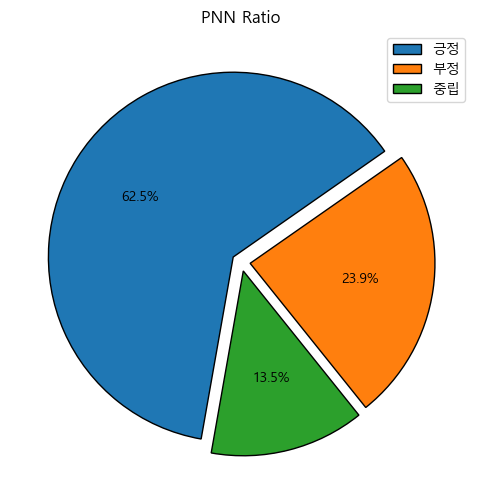

In [44]:
draw_pi(senti_data, 'result')

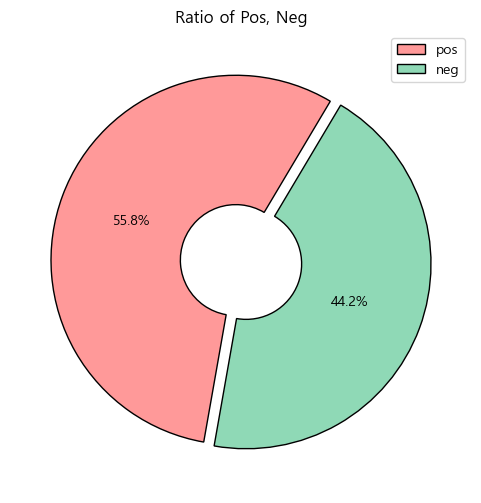

In [45]:
draw_multi_pi(senti_data, ['pos', 'neg'])

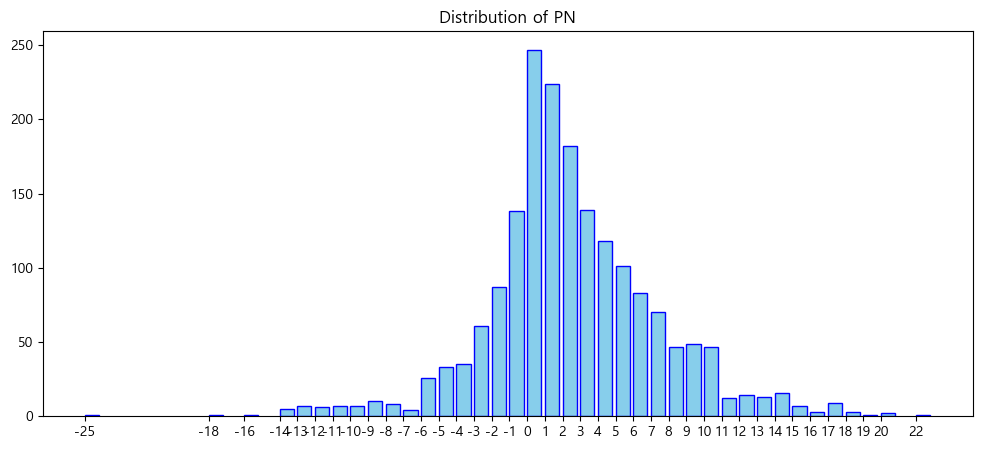

In [46]:
draw_chart(senti_data, 'senti_score')

중립 워드클라우드


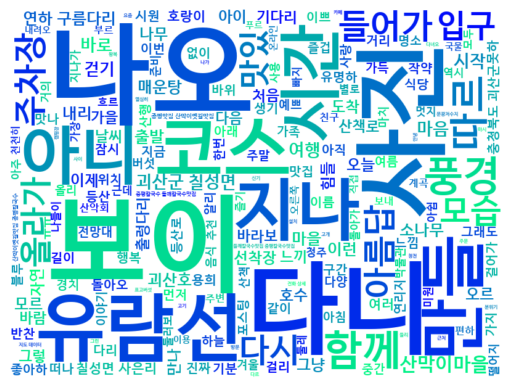

긍정 워드클라우드


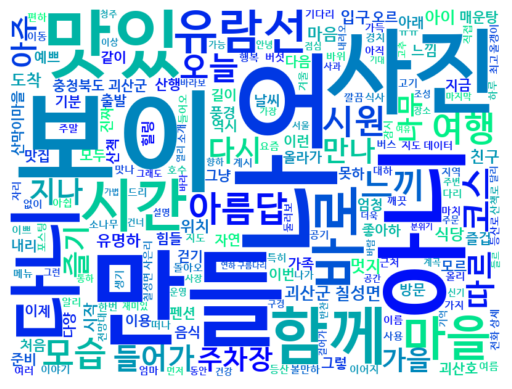

부정 워드클라우드


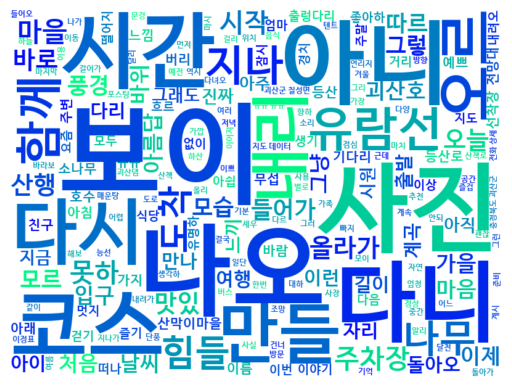

In [62]:
draw_cloud(mergedTextList)